In [1]:
from Bio import SeqIO, Entrez
!ls data

1000genomes  genome_assemblies_genome_fasta  genome_assemblies_genome_fasta.tar


In [2]:
handle = Entrez.efetch(db="gene", id="11681", rettype="xml")

/home/dannytb/anaconda3/lib/python3.6/site-packages/Bio/Entrez/__init__.py:670: UserWarning: 
Email address is not specified.

To make use of NCBI's E-utilities, NCBI requires you to specify your
email address with each request.  As an example, if your email address
is A.N.Other@example.com, you can specify it as follows:
   from Bio import Entrez
   Entrez.email = 'A.N.Other@example.com'
In case of excessive usage of the E-utilities, NCBI will attempt to contact
a user at the email address provided before blocking access to the
E-utilities.
  UserWarning,


In [77]:
phages_download = Entrez.read(handle)
handle.close()

In [79]:
phages_download

[{'Entrezgene_track-info': {'Gene-track': {'Gene-track_geneid': '11681', 'Gene-track_status': StringElement('1', attributes={'value': 'secondary'}), 'Gene-track_current-id': [{'Dbtag_db': 'LocusID', 'Dbtag_tag': {'Object-id': {'Object-id_id': '109855'}}}, {'Dbtag_db': 'GeneID', 'Dbtag_tag': {'Object-id': {'Object-id_id': '109855'}}}], 'Gene-track_create-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '1999', 'Date-std_month': '9', 'Date-std_day': '19'}}}}, 'Gene-track_update-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2017', 'Date-std_month': '4', 'Date-std_day': '8'}}}}, 'Gene-track_discontinue-date': {'Date': {'Date_std': {'Date-std': {'Date-std_year': '2005', 'Date-std_month': '5', 'Date-std_day': '10', 'Date-std_hour': '10', 'Date-std_minute': '40', 'Date-std_second': '0'}}}}}}, 'Entrezgene_type': StringElement('6', attributes={'value': 'protein-coding'}), 'Entrezgene_source': {'BioSource': {'BioSource_genome': StringElement('1', attributes={'value': 'g

# Do some basic analysis on Cannabis sativa Reference Genome (https://www.ncbi.nlm.nih.gov/assembly/GCA_001865755.1/#/def)

In [65]:
PURPLE_LOCATION = "data/genome_assemblies_genome_fasta/ncbi-genomes-2021-04-07/GCF_900626175.2_cs10_genomic.fna"
records = list(SeqIO.parse(PURPLE_LOCATION, "fasta"))

In [66]:
chromosomes = records[0:10]

In [77]:
total_len = 0
for cur_rec in chromosomes:
    print(cur_rec.description, ":")
    numAT = cur_rec.seq.count("A")+cur_rec.seq.count("a")+\
        cur_rec.seq.count("T")+cur_rec.seq.count("t")
    numGC = cur_rec.seq.count("G")+cur_rec.seq.count("g")+\
        cur_rec.seq.count("C")+cur_rec.seq.count("c")
    numN = cur_rec.seq.count("N")+cur_rec.seq.count("n")
    totl = numAT+numGC+numN
    total_len+=totl
    
    print("\tLength = {:,}bp".format(totl))
    print("\tContents: AT = {:0.3}%, GC = {:0.3}%, N = {:0.3}%".format(100*numAT/totl, 100*numGC/totl, 100*numN/totl))
    
    print("*"*80)
print("total_len = ", total_len)

NC_044371.1 Cannabis sativa chromosome 1, cs10, whole genome shotgun sequence :
	Length = 101,209,240bp
	Contents: AT = 48.4%, GC = 23.9%, N = 27.7%
********************************************************************************
NC_044375.1 Cannabis sativa chromosome 2, cs10, whole genome shotgun sequence :
	Length = 96,346,938bp
	Contents: AT = 53.0%, GC = 26.9%, N = 20.1%
********************************************************************************
NC_044372.1 Cannabis sativa chromosome 3, cs10, whole genome shotgun sequence :
	Length = 94,670,641bp
	Contents: AT = 54.2%, GC = 27.2%, N = 18.6%
********************************************************************************
NC_044373.1 Cannabis sativa chromosome 4, cs10, whole genome shotgun sequence :
	Length = 91,913,879bp
	Contents: AT = 56.3%, GC = 27.9%, N = 15.8%
********************************************************************************
NC_044374.1 Cannabis sativa chromosome 5, cs10, whole genome shotgun sequence :
	Le

In [74]:
import matplotlib.pyplot as plt
import numpy as np

In [70]:
chromosomes[5]

SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...tgT'), id='NC_044377.1', name='NC_044377.1', description='NC_044377.1 Cannabis sativa chromosome 6, cs10, whole genome shotgun sequence', dbxrefs=[])

In [76]:
cseq = chromosomes[5].seq
(cseq.count("G")+cseq.count("g")+cseq.count("C")+cseq.count("c"))/len(cseq)

0.3146350282135506

In [69]:
winsize = 100
sequence = chromosomes[5].seq
X = []
gc_cont = []
for ii in range(0, len(sequence), winsize):
    cseq = sequence[ii:ii+winsize]
    if cseq.count("N") + cseq.count("n") == 0:
        cgc = (cseq.count("G")+cseq.count("g")+cseq.count("C")+cseq.count("c"))/len(cseq)
        gc_cont.append(cgc)
        X.append(ii)

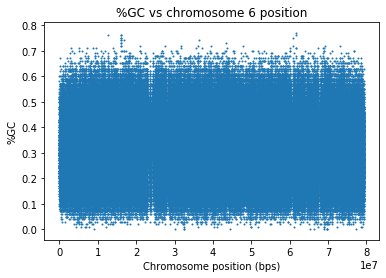

In [53]:
plt.figure()
plt.title("%GC vs chromosome 6 position")
plt.xlabel("Chromosome position (bps)")
plt.ylabel("%GC")
plt.scatter(X, gc_cont, s=1)

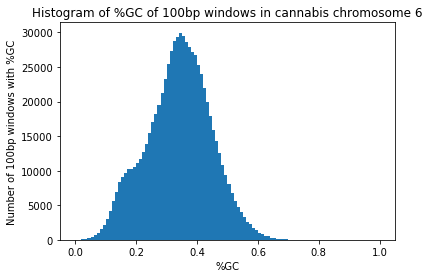

In [71]:
plt.figure()
plt.title("Histogram of %GC of 100bp windows in cannabis chromosome 6")
plt.xlabel("%GC")
plt.ylabel("Number of 100bp windows with %GC")
bins = [x/100 for x in range(101)]
plt.hist(gc_cont, bins=bins)
print()

In [75]:
np.mean(gc_cont)

0.33500540214072394

### Find all the genes

In [80]:
import re
import statistics

In [88]:
gene_pattern = re.compile(r'ATG((?:[ACTG]{3})+?)(?:TAG|TAA|TGA)')

genes = gene_pattern.findall(str(sequence))

In [97]:
#filter out small genes
cuttoff = 350
genes = [xx for xx in genes if len(xx)>cuttoff]

In [100]:
seq_str = str(sequence)

In [104]:
gene_idx = []
for gene in genes:
    st_idx = seq_str.find(gene)
    gene_idx.append((st_idx, st_idx+len(gene)))

In [105]:
gene_idx

[(76132, 77629),
 (106775, 107126),
 (121935, 122349),
 (148661, 149204),
 (159382, 160450),
 (217018, 217402),
 (246474, 246840),
 (323570, 323981),
 (330063, 331074),
 (335027, 335414),
 (395251, 395908),
 (604994, 605501),
 (639342, 639699),
 (695434, 695803),
 (802664, 803204),
 (842617, 842977),
 (852732, 853803),
 (862249, 862945),
 (912457, 913552),
 (929362, 929806),
 (945669, 946434),
 (961426, 961855),
 (979478, 979868),
 (1027357, 1028104),
 (1073986, 1074385),
 (1109941, 1111459),
 (1111715, 1112180),
 (1120236, 1121094),
 (1129646, 1130171),
 (1149567, 1150128),
 (1351392, 1352160),
 (1445212, 1446766),
 (1512965, 1513853),
 (1688942, 1689317),
 (1689334, 1689853),
 (1695186, 1695537),
 (1697380, 1699357),
 (1713629, 1714199),
 (1715806, 1716328),
 (1797257, 1797611),
 (1805682, 1806222),
 (1881004, 1881877),
 (1924442, 1924826),
 (1929144, 1929567),
 (1939012, 1939756),
 (1997199, 1997577),
 (2012936, 2013812),
 (2014206, 2014608),
 (2019510, 2020086),
 (2064200, 2064752)

In [84]:
gene_lens = [len(x) for x in genes]
gene_len_mean = statistics.mean(gene_lens)
gene_len_stdev = statistics.stdev(gene_lens)
print("Gene length: mean = {}, stdev = {}".format(gene_len_mean, gene_len_stdev))
stats_toplot.append(("Gene Lengths", gene_lens))

Gene length: mean = 578.7853260869565, stdev = 290.9911161300645


In [98]:
print(len(gene_lens), " genes found")

1104  genes found


In [86]:
gene_gc = []
for x in genes:
    gene_gc.append((x.count('C')+x.count('G'))/(x.count('C')+x.count('G')+x.count('A')+x.count('T')))

In [107]:
stats_toplot.append(("Gene GC content", gene_gc))

In [111]:
print("Mean GC = {}, stdev = {}".format(statistics.mean(gene_gc), statistics.stdev(gene_gc)))

Mean GC = 0.4337088939498997, stdev = 0.047069579788192324


In [108]:
def plot_stats(stats):
    plt.figure(figsize=(5*len(stats), 5))

    for ii, stat in enumerate(stats):
        plt.subplot(1, len(stats), ii+1) 
        plt.title(stat[0]+" frequency")
        plt.xlabel(stat[0]+" bins")
        plt.ylabel("occurances")
        plt.hist(stat[1], bins = 20)

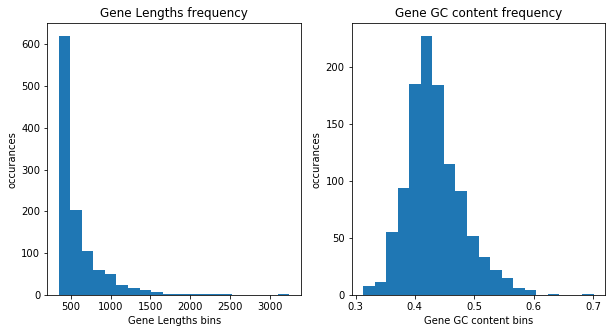

In [109]:
plot_stats(stats_toplot)

# other stuffs

In [74]:
aa = 'ATCGAATT'
aa.count('A')

3

In [57]:
handle = Entrez.efetch(db="nuccore", id="UZAU00000000", rettype="gb", retmode="xml")
phages_download = Entrez.read(handle)
handle.close()

/home/dannytb/anaconda3/lib/python3.6/site-packages/Bio/Entrez/__init__.py:670: UserWarning: 
Email address is not specified.

To make use of NCBI's E-utilities, NCBI requires you to specify your
email address with each request.  As an example, if your email address
is A.N.Other@example.com, you can specify it as follows:
   from Bio import Entrez
   Entrez.email = 'A.N.Other@example.com'
In case of excessive usage of the E-utilities, NCBI will attempt to contact
a user at the email address provided before blocking access to the
E-utilities.
  UserWarning,


In [58]:
phages_download

[{'GBSeq_locus': 'UZAU01000000', 'GBSeq_length': '1051', 'GBSeq_strandedness': 'double', 'GBSeq_moltype': 'DNA', 'GBSeq_topology': 'linear', 'GBSeq_division': 'PLN', 'GBSeq_update-date': '22-JAN-2019', 'GBSeq_create-date': '22-JAN-2019', 'GBSeq_definition': 'Cannabis sativa, whole genome shotgun sequencing project', 'GBSeq_primary-accession': 'UZAU00000000', 'GBSeq_accession-version': 'UZAU00000000.1', 'GBSeq_other-seqids': ['emb|UZAU00000000.1|UZAU01000000', 'gi|1561027321'], 'GBSeq_project': 'PRJEB29284', 'GBSeq_keywords': ['WGS'], 'GBSeq_source': 'Cannabis sativa', 'GBSeq_organism': 'Cannabis sativa', 'GBSeq_taxonomy': 'Eukaryota; Viridiplantae; Streptophyta; Embryophyta; Tracheophyta; Spermatophyta; Magnoliopsida; eudicotyledons; Gunneridae; Pentapetalae; rosids; fabids; Rosales; Cannabaceae; Cannabis', 'GBSeq_references': [{'GBReference_reference': '1', 'GBReference_position': '1..1051', 'GBReference_authors': ['Grassa J,C.'], 'GBReference_title': 'Direct Submission', 'GBReference

# Save shorter sequence

In [39]:
SeqIO.write(records[5], "canabis_stavia_chrom6.fa", "fasta")

1

In [40]:
records = list(SeqIO.parse("canabis_stavia_chrom6.fa", "fasta"))

In [43]:
len(records[0].seq)

79335105

# Using 1000 genomes references

In [27]:
import os
from Bio import SeqIO, Entrez
!ls data/1000genomes

bowtie2_output_chrom6_part1.sam
cannabis_reference-assemblies_AGQN01_AGQN01.2.fq
cannabis_reference-assemblies_AGQN01_AGQN01.2.fsa_nt
cannabis_reference-assemblies_AGQN01_AGQN01.2_part0.fq
cannabis_reference-assemblies_AGQN01_AGQN01.2_part0.fsa_nt
cannabis_reference-assemblies_AGQN01_AGQN01.2_part1.fq
cannabis_reference-assemblies_AGQN01_AGQN01.2_part1.fsa_nt
cannabis_reference-assemblies_AGQN01_AGQN01.2_part2.fq
cannabis_reference-assemblies_AGQN01_AGQN01.2_part2.fsa_nt
cannabis_reference-assemblies_AGQN01_AGQN01.2_part3.fq
cannabis_reference-assemblies_AGQN01_AGQN01.2_part3.fsa_nt
cannabis_reference-assemblies_AGQN01_AGQN01.2_part4.fq
cannabis_reference-assemblies_AGQN01_AGQN01.2_part4.fsa_nt
cannabis_reference-assemblies_AGQN01_AGQN01.2_part5.fq
cannabis_reference-assemblies_AGQN01_AGQN01.2_part5.fsa_nt
cannabis_reference-assemblies_AGQN01_AGQN01.2_part6.fq
cannabis_reference-assemblies_AGQN01_AGQN01.2_part6.fsa_nt
cannabis_reference-assemblies_AGQN01_AGQN01.2_part7.fq
cannabis_refe

In [11]:
suff = "data/1000genomes/"
PURPLE_KUSH = suff+"cannabis_reference-assemblies_AGQN01_AGQN01.2.fsa_nt"
LA_CONF = suff+"cannabis_reference-assemblies_LKUA01_LKUA01.2.fsa_nt"
CHEMDOG_91 = suff+"cannabis_reference-assemblies_LKUB01_LKUB01.1.fsa_nt"
CANNATONIC = suff+"cannabis_reference-assemblies_MNPR01_MNPR01.2.fsa_nt"

In [45]:
records = list(SeqIO.parse(PURPLE_KUSH, "fasta"))

In [24]:
descs = [xx.description for xx in records]

In [25]:
len(descs)

101389

In [112]:
for cname in [PURPLE_KUSH, LA_CONF, CHEMDOG_91, CANNATONIC]:
    records = list(SeqIO.parse(cname, "fasta"))
    print(cname)
    print(len(records), " scaffolds")
    total_len = 0
    for cur_rec in records:
    #     print(cur_rec.description, ":")
        numAT = cur_rec.seq.count("A")+cur_rec.seq.count("a")+\
            cur_rec.seq.count("T")+cur_rec.seq.count("t")
        numGC = cur_rec.seq.count("G")+cur_rec.seq.count("g")+\
            cur_rec.seq.count("C")+cur_rec.seq.count("c")
        numN = cur_rec.seq.count("N")+cur_rec.seq.count("n")
        totl = numAT+numGC+numN
        total_len+=totl

    #     print("\tLength = {:,}bp".format(totl))
    #     print("\tContents: GC = {:0.3}%, AT = {:0.3}%, N = {:0.3}%".format(100*numAT/totl, 100*numGC/totl, 100*numN/totl))

    #     print("*"*80)
    print("total_len = ", total_len)
    print("*"*50)

data/1000genomes/cannabis_reference-assemblies_AGQN01_AGQN01.2.fsa_nt
101389  scaffolds
total_len =  106910377
**************************************************
data/1000genomes/cannabis_reference-assemblies_LKUA01_LKUA01.2.fsa_nt
138554  scaffolds
total_len =  109156532
**************************************************
data/1000genomes/cannabis_reference-assemblies_LKUB01_LKUB01.1.fsa_nt
175088  scaffolds
total_len =  285932793
**************************************************
data/1000genomes/cannabis_reference-assemblies_MNPR01_MNPR01.2.fsa_nt
6687  scaffolds
total_len =  86155739
**************************************************


In [46]:
num_tosplit = 10
half_len = int(len(descs)/num_tosplit)

for ii in range(num_tosplit):
    SeqIO.write(records[(half_len*ii):(half_len*(ii+1))], suff+"cannabis_reference-assemblies_AGQN01_AGQN01.2_part{}.fsa_nt".format(ii), "fasta")

In [34]:
SeqIO.write(records[0:half_len], suff+"cannabis_reference-assemblies_AGQN01_AGQN01.2_part1.fsa_nt", "fasta")

25347

In [35]:
SeqIO.write(records[half_len:2*half_len], suff+"cannabis_reference-assemblies_AGQN01_AGQN01.2_part2.fsa_nt", "fasta")

25347

In [36]:
SeqIO.write(records[2*half_len:3*half_len], suff+"cannabis_reference-assemblies_AGQN01_AGQN01.2_part3.fsa_nt", "fasta")

25347

In [37]:
SeqIO.write(records[3*half_len:], suff+"cannabis_reference-assemblies_AGQN01_AGQN01.2_part4.fsa_nt", "fasta")

25348

# Split the FASTQ file into two

In [20]:
PURPLE_KUSH_FQ="cannabis_reference-assemblies_AGQN01_AGQN01.2.fq"

In [22]:
records = list(SeqIO.parse(PURPLE_KUSH, "fasta"))

# Test 1

In [2]:
!ls alignment_test2/

canabis_stavia_chrom6.fa				      chr6.4.bt2
cannabis_SRA-projects_SRP006678_SRS214097__1_SRR306861.fastq  chr6.rev.1.bt2
chr6.1.bt2						      chr6.rev.2.bt2
chr6.2.bt2						      outp1.sam
chr6.3.bt2


`bowtie2-build canabis_stavia_chrom6.fa chr6`

`bowtie2 -x chr6 -U cannabis_SRA-projects_SRP006678_SRS214097__1_SRR306861.fastq > outp1.sam`

In [3]:
!samtools flagstat alignment_test2/outp1.sam

32615791 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
2664309 + 0 mapped (8.17% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


`samtools sort -o outp1_sorted.sam outp1.sam `

`freebayes -f canabis_stavia_chrom6.fa outp1_sorted.sam > freebayes_output.freebayes.vcf`

`bcftools filter -i "QUAL>20" freebayes_output.freebayes.vcf`

`bcftools filter -i "QUAL>20" freebayes_output.freebayes.vcf > filtered_ouptut.freebayes.vcf`



# Automate the running process for all the aforementioned commands

Note, we are only doing chromosome 6 because I read that the most important gene for neurogenic chemicals occur on this chromosome, but further investigation could be done on all the chromosomes. 

In [1]:
import os

In [2]:
!ls
print("-"*60)
!ls called_vars

alignment_test1  data			       prelim_report.odt
alignment_test2  final_project_notebook.ipynb  prelim_report.pdf
archives	 frebys_pt0_qual.vcf	       seqtk
called_vars	 frebys_pt0.vcf		       stats_output_pt0
------------------------------------------------------------
1  10  2  3  4	5  6  7  8  9  ref


In [3]:
#build the directory queue

BASE_DIR = "called_vars/"

REF = "called_vars/ref/"
REF_FA = "called_vars/ref/canabis_stavia_chrom6.fa"
REF_NM = "called_vars/ref/chr6"

GENOMES_BASES = []
GENOMES_ACTUAL = []

for ii in range(1, 11):
    GENOMES_BASES.append(BASE_DIR + "{}/".format(ii))
    GENOMES_ACTUAL.append(GENOMES_BASES[-1] + os.listdir(GENOMES_BASES[-1])[0])

In [4]:
GENOMES_BASES, GENOMES_ACTUAL

(['called_vars/1/',
  'called_vars/2/',
  'called_vars/3/',
  'called_vars/4/',
  'called_vars/5/',
  'called_vars/6/',
  'called_vars/7/',
  'called_vars/8/',
  'called_vars/9/',
  'called_vars/10/'],
 ['called_vars/1/temp2.sam',
  'called_vars/2/cannabis_SRA-projects_SRP006678_SRS214115__1_SRR306884.fastq',
  'called_vars/3/temp2.sam',
  'called_vars/4/cannabis_SRA-projects_SRP006678_SRS214114__1_SRR306877.fastq',
  'called_vars/5/cannabis_SRA-projects_SRP006678_SRS214116__1_SRR306885.fastq',
  'called_vars/6/temp2.sam',
  'called_vars/7/temp2.sam',
  'called_vars/8/cannabis_SRA-projects_SRP006678_SRS214112__1_SRR306874.fastq',
  'called_vars/9/temp2.sam',
  'called_vars/10/temp2.sam'])

In [15]:
for genome_base, genome_actual in zip(GENOMES_BASES, GENOMES_ACTUAL):
    print("Processing: ", genome_base)
    print()
    
    svdir1 = "{}temp1.sam".format(genome_base)
    os.system("bowtie2 -x {} -U {} > {}".format(REF_NM, genome_actual, svdir1))
    
    print("ALIGNMENT SUMMARY:")
    os.system("samtools flagstat {}".format(svdir1))
    print()
    
    svdir2 = "{}temp2.sam".format(genome_base)
    os.system("samtools sort -o {} {}".format(svdir2, svdir1))
    
    svdir3 = "{}temp3.freebayes.vcf".format(genome_base)
    os.system("freebayes -f {} {} > {}".format(REF_FA, svdir2, svdir3))
    
    svdir4 = "{}temp4.freebayes.vcf".format(genome_base)
    os.system("bcftools filter -i \"QUAL>20\" {} > {}".format(svdir3, svdir4))
    
    print("*"*80)
    
    

Processing:  called_vars/1/

ALIGNMENT SUMMARY:

********************************************************************************
Processing:  called_vars/2/

ALIGNMENT SUMMARY:

********************************************************************************
Processing:  called_vars/3/

ALIGNMENT SUMMARY:

********************************************************************************
Processing:  called_vars/4/

ALIGNMENT SUMMARY:

********************************************************************************
Processing:  called_vars/5/

ALIGNMENT SUMMARY:

********************************************************************************
Processing:  called_vars/6/

ALIGNMENT SUMMARY:

********************************************************************************
Processing:  called_vars/7/

ALIGNMENT SUMMARY:

********************************************************************************
Processing:  called_vars/8/

ALIGNMENT SUMMARY:

*****************************************

In [5]:
def extract_positions(filename):
    a_file = open(filename)

    lines = a_file.readlines()

    posses = []
    for line in lines:
        if line.startswith("#"):
            continue
        posses.append(line.split("\t")[1])   
        
    return posses

In [6]:
positions = []
for ii in range(1, 11):
    positions.append(extract_positions(BASE_DIR+str(ii)+"/temp4.freebayes.vcf"))

In [7]:
for ii in range(10):
    print(len(positions[ii]))

18612
12561
10344
17175
15514
13212
13450
15544
18780
17505


In [8]:
# Re-factor Quality Value

for genome_base, genome_actual in zip(GENOMES_BASES, GENOMES_ACTUAL):
    svdir3 = "{}temp3.freebayes.vcf".format(genome_base)
    
    svdir4 = "{}temp4_50.freebayes.vcf".format(genome_base)
    os.system("bcftools filter -i \"QUAL>50\" {} > {}".format(svdir3, svdir4))

In [9]:
positions = []
for ii in range(1, 11):
    positions.append(extract_positions(BASE_DIR+str(ii)+"/temp4_50.freebayes.vcf"))

In [10]:
for ii in range(10):
    print(len(positions[ii]))

14586
9341
7767
13430
11554
10560
10377
11766
14140
13509


In [15]:
all_pos = []
for lst in positions:
    all_pos.extend(lst)

In [16]:
all_pos_int = []
for aa in all_pos:
    all_pos_int.append(int(aa))

In [17]:
all_pos_int.sort()

In [18]:
all_pos_int

[2080,
 2156,
 2156,
 2156,
 2245,
 2245,
 2245,
 2245,
 2245,
 2315,
 2315,
 2315,
 2315,
 2315,
 2315,
 2315,
 2315,
 2315,
 2315,
 2444,
 2447,
 2447,
 2447,
 2447,
 2447,
 2447,
 2447,
 2447,
 2447,
 2878,
 2878,
 2878,
 2878,
 2878,
 2878,
 2878,
 2878,
 2878,
 2878,
 2896,
 2896,
 2896,
 2896,
 2896,
 2896,
 2896,
 2896,
 2896,
 2896,
 2968,
 3146,
 3146,
 4625,
 4625,
 4625,
 4625,
 4625,
 4625,
 4625,
 4828,
 5402,
 5402,
 5402,
 5402,
 5402,
 5478,
 5564,
 6078,
 6179,
 6179,
 6179,
 6179,
 6179,
 6179,
 6179,
 6179,
 6179,
 6179,
 6818,
 6927,
 16244,
 17314,
 43147,
 43147,
 43147,
 43147,
 43147,
 43147,
 43147,
 43147,
 43147,
 43147,
 43290,
 43296,
 43296,
 43296,
 43296,
 43296,
 43348,
 43348,
 43348,
 43348,
 43348,
 43348,
 43348,
 43348,
 43348,
 43348,
 43390,
 43390,
 43390,
 43488,
 43488,
 43488,
 43494,
 43494,
 43494,
 43494,
 43494,
 43494,
 43494,
 43494,
 43494,
 43715,
 43715,
 44026,
 44253,
 44456,
 44456,
 44954,
 45125,
 45125,
 45125,
 45125,
 45125,


In [23]:
ress_vals = []
ress_occs = []

curval = all_pos_int[0]
currun = 1

for cur in all_pos_int[1:]:
    if cur == curval:
        currun += 1
    else:
        ress_vals.append(curval)
        ress_occs.append(currun)
        curval = cur
        currun = 1

In [25]:
import matplotlib.pyplot as plt

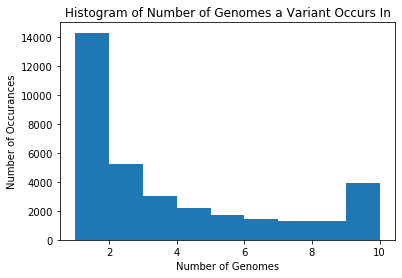

In [56]:
plt.figure()
plt.title("Histogram of Number of Genomes a Variant Occurs In")
plt.xlabel("Number of Genomes")
plt.ylabel("Number of Occurances")
hist_out = plt.hist(ress_occs, bins = list(range(1, 11)))

In [46]:
# Fitting a distribution to the data
# Assumin that this is a random process it should be represented by the following distribution
# i.e f(x) = (1-p)^(10-x)*p^x where p is the probability of a SNP and 

records = SeqIO.parse(REF_FA, 'fasta')
descs = [xx for xx in records]

In [47]:
descs

[SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...tgT'), id='NC_044377.1', name='NC_044377.1', description='NC_044377.1 Cannabis sativa chromosome 6, cs10, whole genome shotgun sequence', dbxrefs=[])]

In [48]:
chr6_len = len(descs[0].seq)

In [59]:
p = hist_out[0][0]/chr6_len

fvals = []
for xx in range(1, 11):
    fvals.append(chr6_len*p**xx)

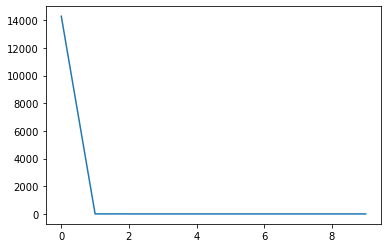

In [60]:
plt.figure()
plt.plot(fvals)

In [78]:
np.sum(hist_out[0])

34368.0

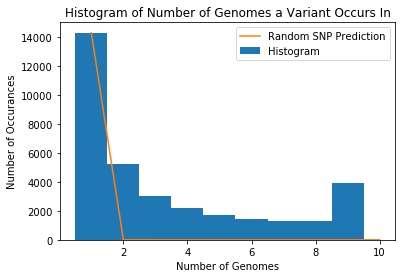

In [64]:
plt.figure()
plt.title("Histogram of Number of Genomes a Variant Occurs In")
plt.xlabel("Number of Genomes")
plt.ylabel("Number of Occurances")
hist_out = plt.hist(ress_occs, bins = list(range(1, 11)), align='left')
plt.plot(list(range(1,11)), fvals)
plt.legend(["Random SNP Prediction", "Histogram"])

In [79]:
fvals

[14286.0,
 2.5725030048173503,
 0.00046323475499050103,
 8.341542763186989e-08,
 1.5020750261172443e-11,
 2.704810666490068e-15,
 4.870596084983705e-19,
 8.770560733495872e-23,
 1.5793289822799383e-26,
 2.8439231082950225e-30]

# Now only look at the variants in genes

In [112]:
def is_ingene(x, gene_idx):
    for locs in gene_idx:
        if x > locs[0] and x < locs[1]:
            return True
    return False

In [113]:
ress_vals = []
ress_occs = []

curval = all_pos_int[0]
currun = 1
ingene = False

for cur in all_pos_int[1:]:
    if cur == curval:
        currun += 1
    else:
        if is_ingene(curval, gene_idx):
            ress_vals.append(curval)
            ress_occs.append(currun)
        
        curval = cur
        currun = 1

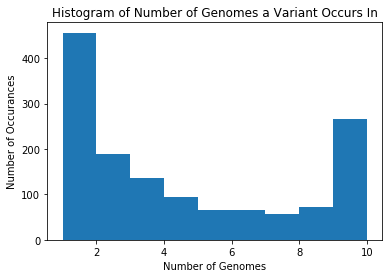

In [115]:
plt.figure()
plt.title("Histogram of Number of Genomes a Variant Occurs In")
plt.xlabel("Number of Genomes")
plt.ylabel("Number of Occurances")
hist_out = plt.hist(ress_occs, bins = list(range(1, 11)))